In [4]:
# Load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Label: 6


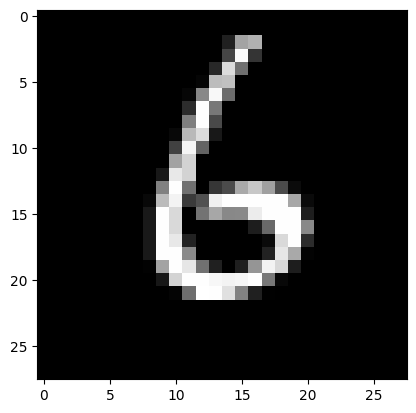

In [7]:
def imshow(img, filepath):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.savefig(filepath)
    plt.show()

# Load a single batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Get a random sample from the batch
sample_img = images[0]
sample_label = labels[0]

# Print the label and show the image
print(f'Label: {sample_label}')
imshow(sample_img, 'images/mnist_sample.png')

In [22]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1_input_size = self._get_fc1_input_size()
        self.fc1 = nn.Linear(self.fc1_input_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def _get_fc1_input_size(self):
        # Calculate the size after conv and pool layers
        size = 28
        size = conv2d_output_size(size, 3, 1, 0) // 2
        size = conv2d_output_size(size, 3, 1, 0) // 2
        return size * size * 64

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

def conv2d_output_size(input_size, kernel_size, stride, padding):
    return (input_size - kernel_size + 2 * padding) // stride + 1

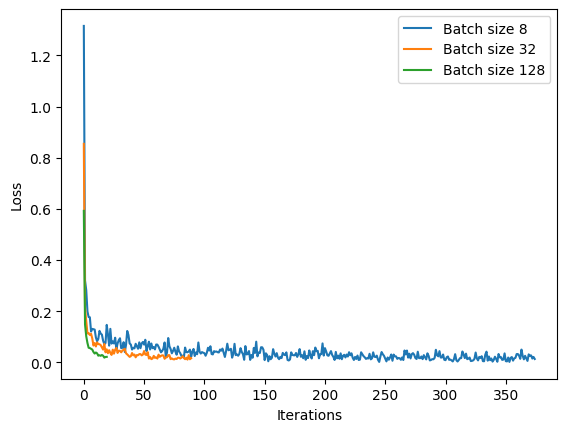

In [23]:

def plot_training_loss(batch_sizes, epochs=5):
    for batch_size in batch_sizes:
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        model = SimpleCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        losses = []
        for epoch in range(epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:
                    losses.append(running_loss / 100)
                    running_loss = 0.0
        plt.plot(losses, label=f'Batch size {batch_size}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example usage
plot_training_loss([8, 32, 128])